In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coca=pd.read_excel("C:/Users/ADITYA/Downloads/CocaCola_Sales_Rawdata.xlsx")
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
coca.shape

(42, 2)

In [4]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
coca.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


C:\Users\ADITYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

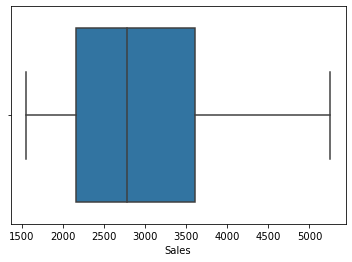

In [10]:
sns.boxplot("Sales",data=coca)

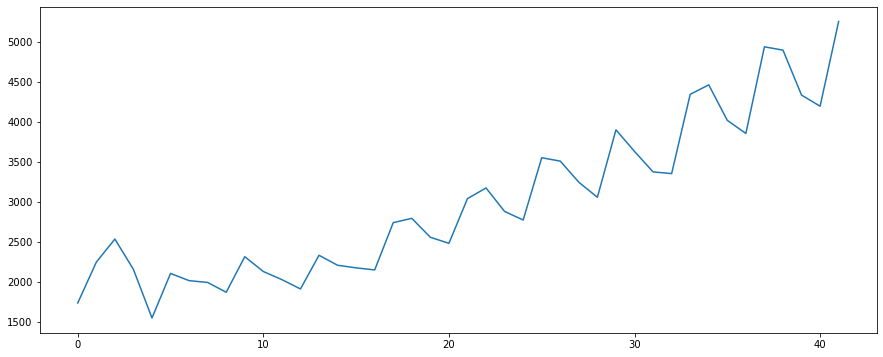

In [11]:
coca['Sales'].plot(figsize=(15, 6))
plt.show()

C:\Users\ADITYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


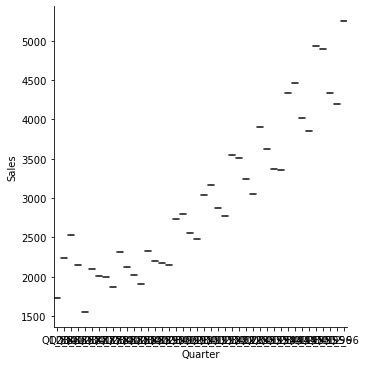

In [12]:
sns.catplot("Quarter","Sales",data=coca,kind="box")

<AxesSubplot:ylabel='Density'>

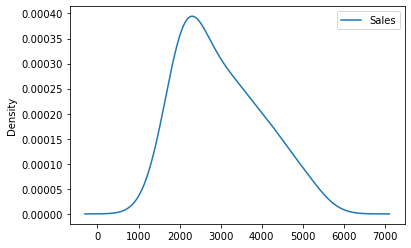

In [13]:
coca.plot(kind='kde')

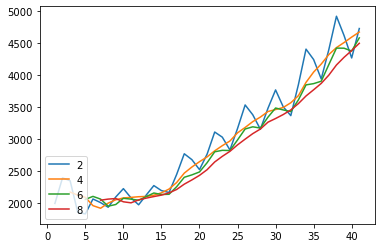

In [14]:
for i in range(2,10,2):
    coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:>

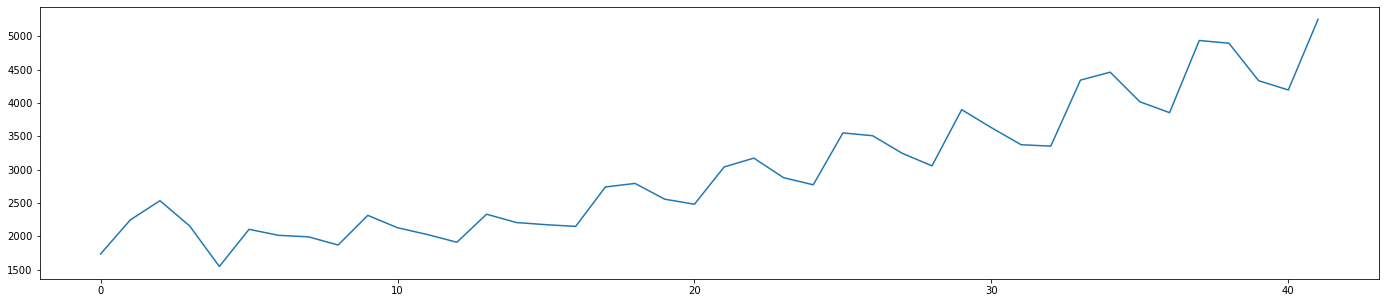

In [15]:
plt.figure(figsize=(24,5))
coca.Sales.plot()

In [17]:
quarter=['Q1','Q2','Q3','Q4']
n=coca['Quarter'][0]
n[0:2]
coca['quarter']=0

In [18]:
for i in range(42):
    n=coca['Quarter'][i]
    coca['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(coca['quarter']))
    coco=pd.concat((coca,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

<ipython-input-18-d867accb3180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca['quarter'][i]=n[0:2]
C:\Users\ADITYA\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
coco.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

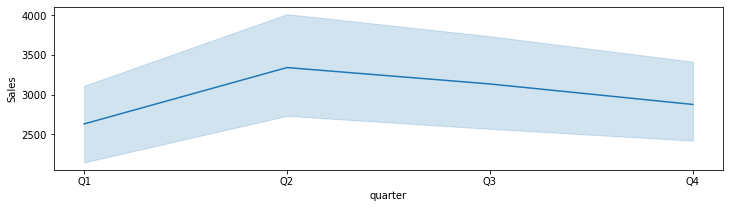

In [20]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=coca)

splitting data

In [21]:
Train = coco.head(38)
Test = coco.tail(4)
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [22]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [23]:
#linear model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.553295722396

In [24]:
#exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.24797310672255

In [25]:
#Quadratic
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.56183518315254

In [26]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547278

In [27]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.7380071935301

In [28]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.389640077973

In [29]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.52439049826944

# compare results

In [30]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,225.524390
4,rmse_add_sea_quad,301.738007
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
3,rmse_add_sea,1860.023815
5,rmse_Mult_sea,1963.389640


In [31]:
# Here we can see that the RMSE value of Multiplicative additive seasonality is low 
#that means this is the best model.

Predict for new time period

In [32]:
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=coco).fit()

In [33]:
pred_new  = pd.Series(Mul_Add_sea.predict(coco))
pred_new

0     7.345823
1     7.587884
2     7.574280
3     7.498859
4     7.440236
5     7.682297
6     7.668693
7     7.593272
8     7.534649
9     7.776710
10    7.763106
11    7.687685
12    7.629062
13    7.871123
14    7.857519
15    7.782098
16    7.723475
17    7.965536
18    7.951932
19    7.876511
20    7.817889
21    8.059949
22    8.046345
23    7.970924
24    7.912302
25    8.154362
26    8.140758
27    8.065338
28    8.006715
29    8.248776
30    8.235171
31    8.159751
32    8.101128
33    8.343189
34    8.329584
35    8.254164
36    8.195541
37    8.437602
38    8.423998
39    8.348577
40    8.289954
41    8.532015
dtype: float64

In [34]:
coco["forecasted_Sales"] = pd.DataFrame(pred_new)
coco

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,7.345823
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,7.587884
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,7.574280
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,7.498859
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,7.440236
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,7.682297
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,7.668693
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,7.593272
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,7.534649
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,7.776710
